In [1]:
# import  all necessary package to work with
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
import datetime
import matplotlib.ticker as tick
%matplotlib inline

In [2]:
#load data into df
df = pd.read_csv('fordgobike-clean.csv')

In [3]:
df.head()

,Unnamed: 0,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_gender,bike_share_for_all_trip,age,duration_min,hour,day,day_of_week,type_of_day
0,0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,Male,No,38,869,17,2019-02-28,Thursday,weekday
1,2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,Male,No,50,1030,12,2019-02-28,Thursday,weekday
2,3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,Subscriber,Other,No,33,608,17,2019-02-28,Thursday,weekday
3,4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,Subscriber,Male,Yes,48,26,23,2019-02-28,Thursday,weekday
4,5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,Subscriber,Male,No,63,29,23,2019-02-28,Thursday,weekday


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174877 entries, 0 to 174876
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               174877 non-null  int64  
 1   start_time               174877 non-null  object 
 2   end_time                 174877 non-null  object 
 3   start_station_id         174877 non-null  float64
 4   start_station_name       174877 non-null  object 
 5   end_station_id           174877 non-null  float64
 6   end_station_name         174877 non-null  object 
 7   user_type                174877 non-null  object 
 8   member_gender            174877 non-null  object 
 9   bike_share_for_all_trip  174877 non-null  object 
 10  age                      174877 non-null  int64  
 11  duration_min             174877 non-null  int64  
 12  hour                     174877 non-null  int64  
 13  day                      174877 non-null  object 
 14  day_

### User type destribution

**Most of users Ford GoBike service are subscribers (91%)**


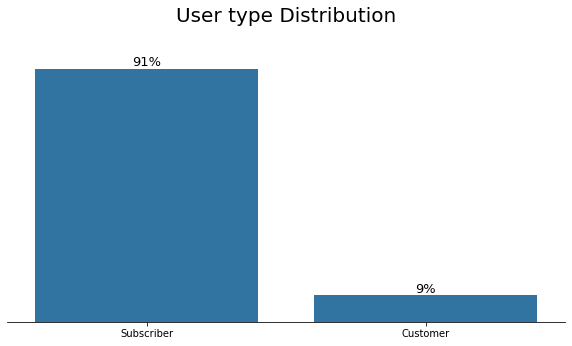

In [11]:
fig, ax = plt.subplots(figsize = (10,5))
base_color = sb.color_palette()[0]    
 
sb.countplot(data= df, x='user_type', order = df['user_type'].value_counts().index,
             color=base_color)
plt.title('number of Customer vs Subscriber') ;

# Calculate % for each user types 
perc_list = []
type_sum = df['user_type'].value_counts().to_list()
total_sum = df.shape[0]
for i in range(0,len(type_sum)):
    percent = int(round(100 * type_sum[i] / total_sum))
    perc_list.append(percent) 
# Annotate bars
i=0
for p in ax.patches:
    ax.annotate('{:.0f}%'.format(perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", color='black', size=13)
    i+=1
plt.ylim([0, 170000])
plt.title('User type Distribution\n', size=20)
sb.despine(fig, left = True)
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.xlabel("");


### Gender destribution by user types

**The majority of users are men both among subscribers and customers**


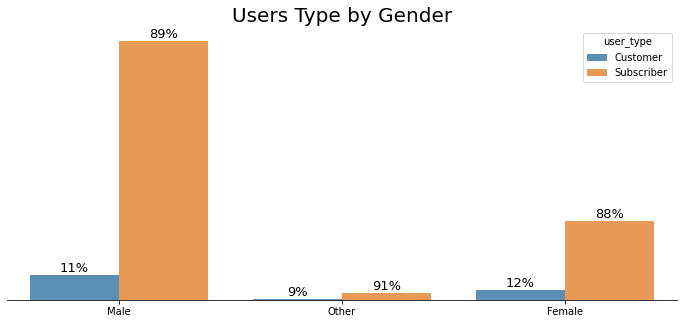

In [22]:
fig, ax = plt.subplots(figsize = (12,5))
sb.countplot(data = df, x = "member_gender", 
               hue = "user_type", alpha = 0.8)
# Percentage for each gender
perc_list_customer, perc_list_subscriber, perc_list = [], [], []
type_sum = df.groupby('member_gender')['user_type'].value_counts().sort_index().to_list()
total_sum = df['member_gender'].value_counts().sort_index().to_list()

# arrange the % list in same as annotate loop order
for i in range(0,len(total_sum)):
    perc_customer = int(round(100 * type_sum[2*i] / total_sum[i]))
    perc_list_customer.append(perc_customer)
for i in range(0,len(total_sum)):
    perc_subscriber = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    perc_list_subscriber.append(perc_subscriber)
perc_list = perc_list_customer + perc_list_subscriber

# annotate each bar
i=0
for p in ax.patches:
    ax.annotate('{:.0f}%'.format(perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", color='black', size=13)
    i+=1

cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sb.despine(fig, left = True)
plt.title('Users Type by Gender', fontsize= 20)
plt.xlabel('');


## Number of customer

**Number of customer is the same across all of weekday , but slightly less in the weekend Number of subscriber is greatly reduced in the weekend**

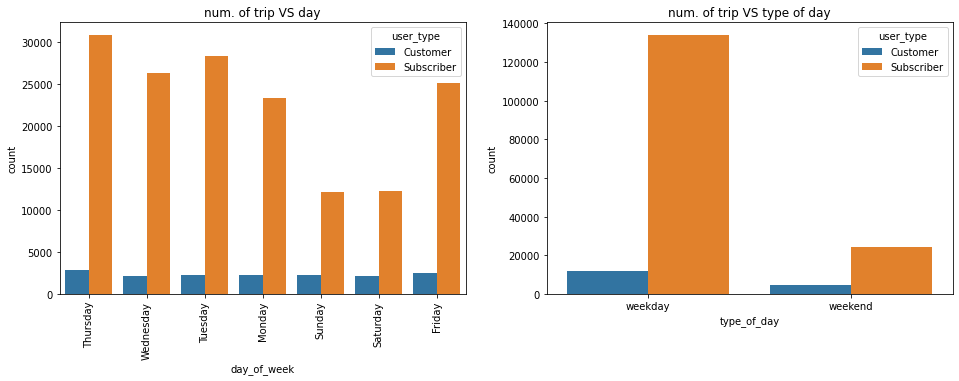

In [20]:
# Plotting numberof trip Vs weekdays Vs the type of day:

plt.figure(figsize = [16, 5])

plt.subplot(1, 2, 1)
sb.countplot(data=df , x='day_of_week', hue='user_type')
plt.title('num. of trip VS day') 
plt.xticks(rotation=90)
    
plt.subplot(1, 2, 2)
sb.countplot(data=df , x='type_of_day', hue='user_type')
plt.title('num. of trip VS type of day');


### Relationship between Duration of ride and user_type age

There is no relationship between duration in minute and age


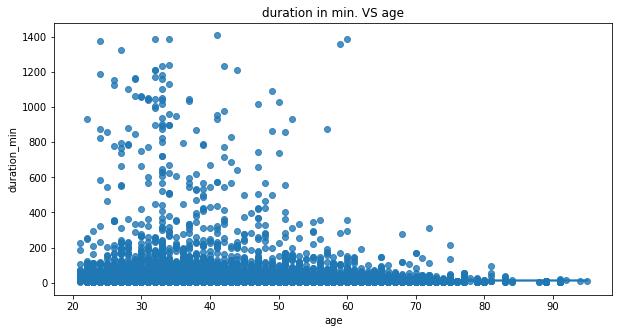

In [23]:
# plotting duration in min. VS age
plt.figure(figsize = [10,5])
sb.regplot(data = df , x = 'age', y = 'duration_min');
plt.title('duration in min. VS age') ;